In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from datetime import timedelta
import seaborn as sns


In [9]:
reuse = pd.read_csv('1711699885---29-03-2024---08:11:25.noreuse.stage2.csv',
  names=["File", "Condition", "Metric", "Value"])
noreuse = pd.read_csv('1711699885---29-03-2024---08:11:25.noreuse.stage3.csv', 
                      names=["File", "Condition", "Metric", "Value"])
print("noreuse"); display(noreuse);
print("reuse"); display(reuse);

noreuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147406848
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538112
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156876
...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_disabled,num_segments,4
8496,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
8497,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
8498,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743


reuse


,File,Condition,Metric,Value
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147394560
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538165
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156925
...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_disabled,num_segments,4
8496,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715
8497,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0
8498,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743


In [14]:
# Filtering the rows where Metric is 'time_elapsed_ms' and then summing the 'Value' column for both DataFrames
sum_time_elapsed_reuse = reuse[reuse["Metric"] == "time_elapsed_ms"]["Value"].sum()
sum_time_elapsed_no_reuse = noreuse[noreuse["Metric"] == "time_elapsed_ms"]["Value"].sum()

sum_time_elapsed_reuse, sum_time_elapsed_no_reuse

# Ensuring the values are in a compatible format for timedelta
time_reuse = timedelta(milliseconds=int(sum_time_elapsed_reuse))
time_no_reuse = timedelta(milliseconds=int(sum_time_elapsed_no_reuse))

# Formatting as hours:minutes:seconds.milliseconds again
time_format_reuse = str(time_reuse)
time_format_no_reuse = str(time_no_reuse)
print(f"time (reuse): {time_format_reuse} | time (noreuse): {time_format_no_reuse}")

time (reuse): 0:35:56.367000 | time (noreuse): 0:35:30.234000


In [15]:
df_merged = pd.merge(reuse, noreuse, on=["File", "Metric"], suffixes=('_reuse', '_no_reuse'))
display(df_merged)

,File,Condition_reuse,Metric,Value_reuse,Condition_no_reuse,Value_no_reuse
0,Init/Prelude.lean,reuse_across_ctor_disabled,rss,147394560,reuse_across_ctor_disabled,147406848
1,Init/Prelude.lean,reuse_across_ctor_disabled,num_alloc,1321689,reuse_across_ctor_disabled,1321689
2,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_alloc,26538165,reuse_across_ctor_disabled,26538112
3,Init/Prelude.lean,reuse_across_ctor_disabled,num_dealloc,1273439,reuse_across_ctor_disabled,1273439
4,Init/Prelude.lean,reuse_across_ctor_disabled,num_small_dealloc,26156925,reuse_across_ctor_disabled,26156876
...,...,...,...,...,...,...
8495,Lake/Main.lean,reuse_across_ctor_disabled,num_segments,4,reuse_across_ctor_disabled,4
8496,Lake/Main.lean,reuse_across_ctor_disabled,num_pages,3715,reuse_across_ctor_disabled,3715
8497,Lake/Main.lean,reuse_across_ctor_disabled,num_exports,0,reuse_across_ctor_disabled,0
8498,Lake/Main.lean,reuse_across_ctor_disabled,num_recycled_pages,743,reuse_across_ctor_disabled,743


,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Lean/Compiler/IR.lean,738,1484,746,50.269542
1,Lean/Compiler/InitAttr.lean,1105,2196,1091,49.681239
2,Lean/PrettyPrinter/Delaborator/SubExpr.lean,1065,1897,832,43.858724
3,Lean/Compiler/IR/UnboxResult.lean,505,895,390,43.575419
4,Lean/Compiler/LCNF/PullLetDecls.lean,1306,2291,985,42.994326
...,...,...,...,...,...
845,Lean/Elab/Tactic/Delta.lean,2588,1325,-1263,-95.320755
846,Lean/Elab/Tactic/Symm.lean,1794,886,-908,-102.483070
847,Lean/Elab/Eval.lean,1821,896,-925,-103.236607
848,Lean/Elab/PreDefinition/WF/TerminationArgument...,3475,1695,-1780,-105.014749


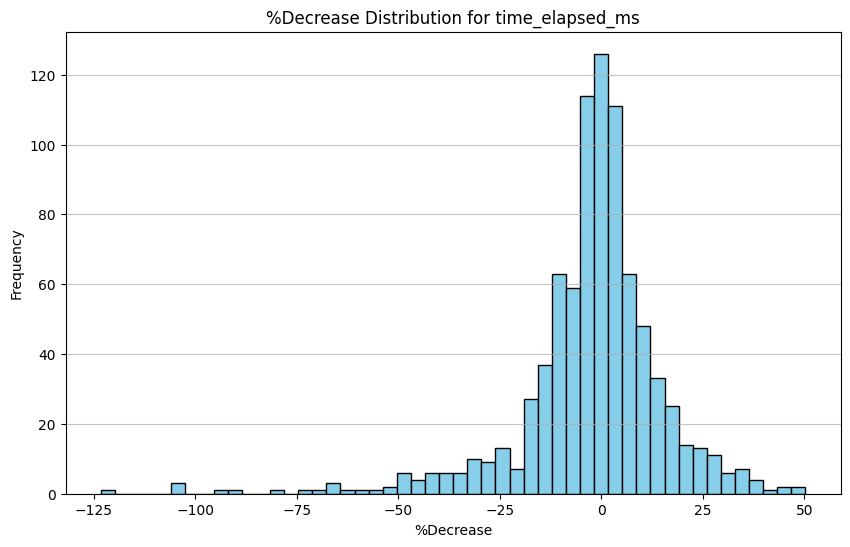

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Data/FloatArray.lean,88350720,89530368,1179648,1.317595
1,Init/Control/Basic.lean,94871552,95920128,1048576,1.093176
2,Init/Classical.lean,111288320,112467968,1179648,1.048875
3,Init/Data/Sum.lean,84230144,85016576,786432,0.925034
4,Init/Omega/Logic.lean,104583168,105500672,917504,0.869666
...,...,...,...,...,...
845,Lean/Elab/Quotation/Util.lean,225468416,223899648,-1568768,-0.700657
846,Lean/Data/Xml/Basic.lean,113606656,112627712,-978944,-0.869186
847,Init/Guard.lean,106020864,105099264,-921600,-0.876885
848,Lean/Data/Json/Printer.lean,126935040,125771776,-1163264,-0.924901


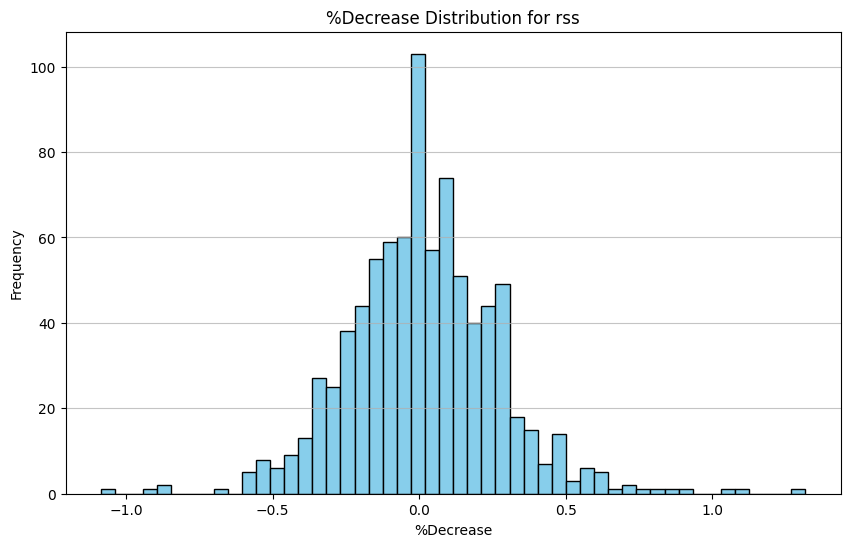

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Leanc.lean,2798448,2798752,304,0.010862
1,Lean/Data/PersistentArray.lean,12783248,12783891,643,0.005030
2,Init/Data/List/Lemmas.lean,32689272,32690011,739,0.002261
3,Init/Data/BitVec/Lemmas.lean,67573064,67574051,987,0.001461
4,Init/Control/Lawful/Instances.lean,17477933,17478050,117,0.000669
...,...,...,...,...,...
845,Init/Data/Nat/Mod.lean,3043129,3043087,-42,-0.001380
846,Init/Data/Fin/Lemmas.lean,32391064,32390526,-538,-0.001661
847,Init/Data/Nat/Lemmas.lean,28124216,28123720,-496,-0.001764
848,Init/Data/Nat/Bitwise/Lemmas.lean,19818586,19817980,-606,-0.003058


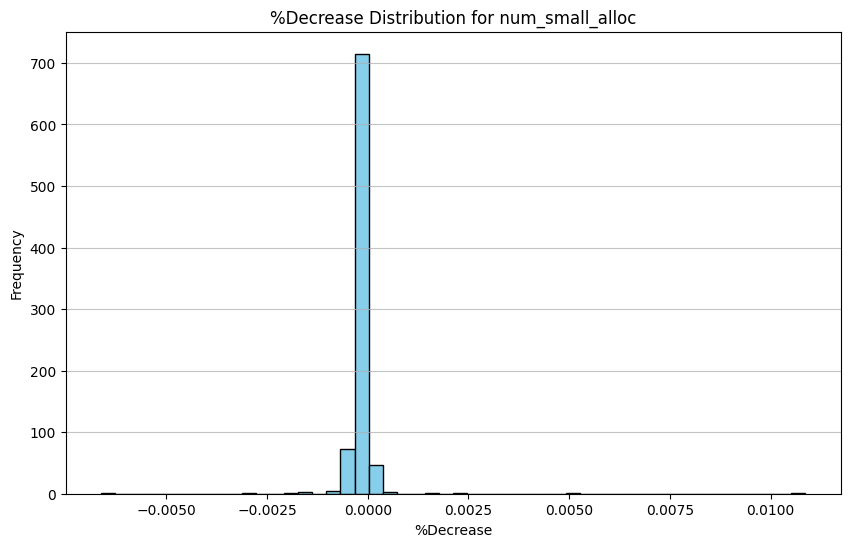

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Init/Prelude.lean,1273439,1273439,0,0.0
1,Lean/Meta/Tactic/Simp/BuiltinSimprocs.lean,33252,33252,0,0.0
2,Lean/Elab/Tactic/Congr.lean,58055,58055,0,0.0
3,Lean/Elab/Tactic/Repeat.lean,116777,116777,0,0.0
4,Lean/Elab/Binders.lean,2070703,2070703,0,0.0
...,...,...,...,...,...
845,Lean/DocString.lean,89425,89425,0,0.0
846,Init.lean,30721,30721,0,0.0
847,Lean/Data/Lsp/Diagnostics.lean,384048,384048,0,0.0
848,Lean/Parser/Basic.lean,1241793,1241793,0,0.0


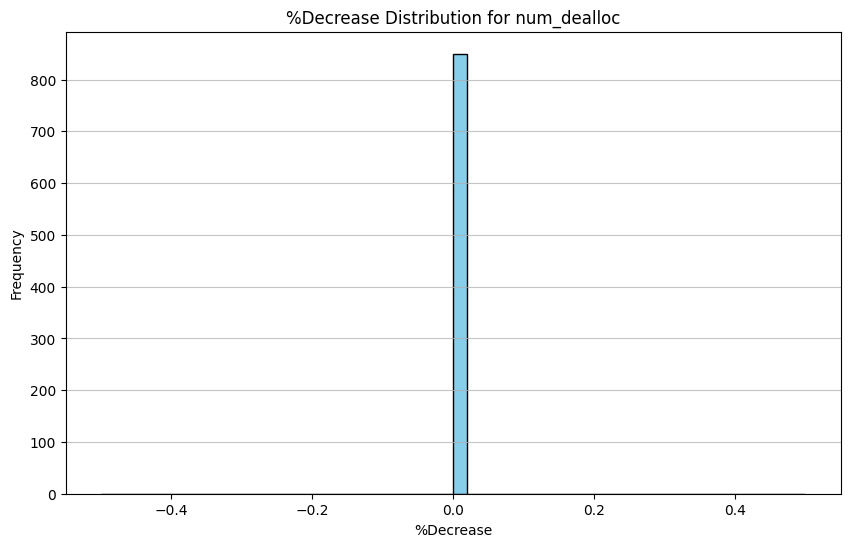

,File,Value_reuse,Value_no_reuse,absolute_diff,%Decrease
0,Leanc.lean,2419341,2419649,308,0.012729
1,Lean/Data/PersistentArray.lean,12390323,12390970,647,0.005222
2,Init/Data/List/Lemmas.lean,32276637,32277377,740,0.002293
3,Init/Data/BitVec/Lemmas.lean,67092979,67093970,991,0.001477
4,Init/Control/Lawful/Instances.lean,17127580,17127701,121,0.000706
...,...,...,...,...,...
845,Init/Data/Nat/Mod.lean,2715534,2715496,-38,-0.001399
846,Init/Data/Fin/Lemmas.lean,31973098,31972564,-534,-0.001670
847,Init/Data/Nat/Lemmas.lean,27712703,27712211,-492,-0.001775
848,Init/Data/Nat/Bitwise/Lemmas.lean,19441279,19440677,-602,-0.003097


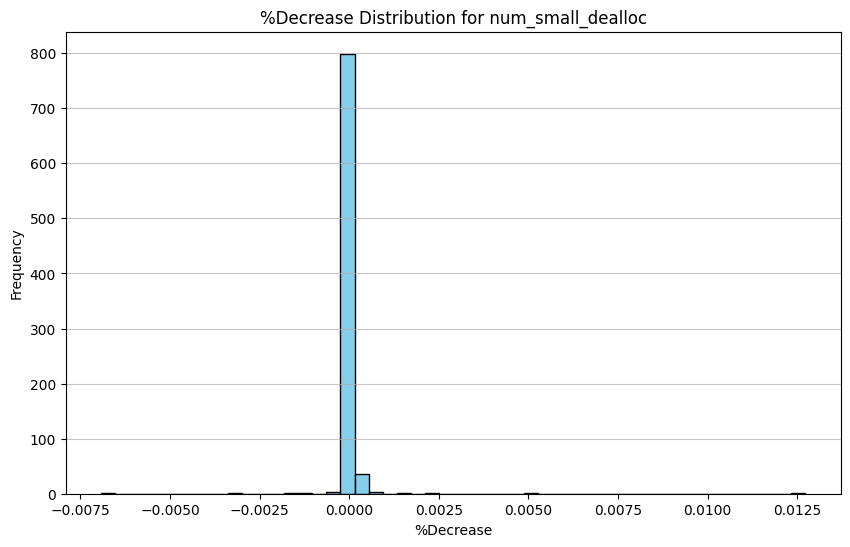

<Axes: >

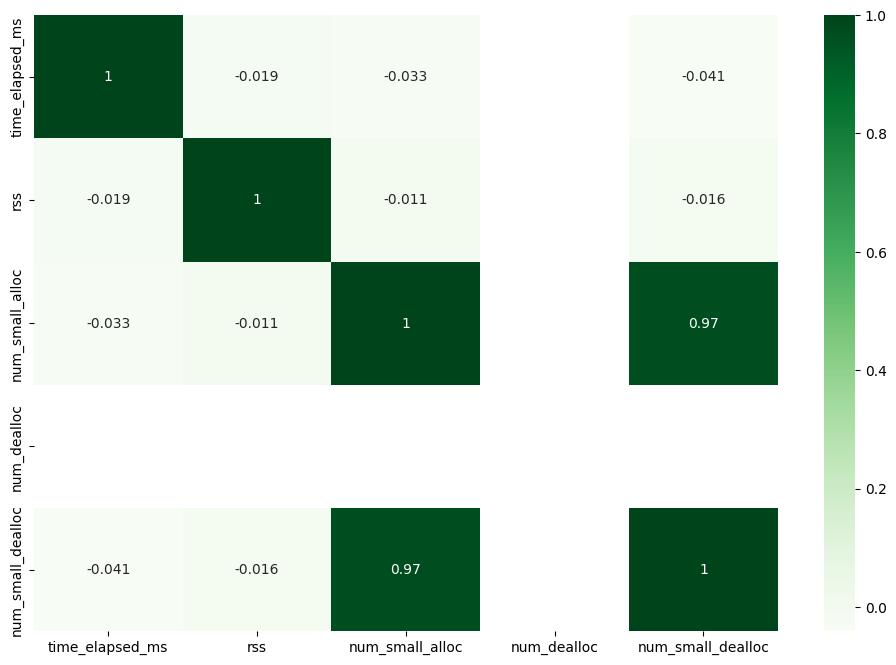

In [16]:
# metrics for which we should compute decreases
df_corr = pd.DataFrame(df_merged["File"].unique(), columns=["File"]) 

for metric in ["time_elapsed_ms", "rss", "num_small_alloc", "num_dealloc", "num_small_dealloc"]:
  display(HTML(f"<h1>{metric}</h1>"))
  df_metric = df_merged[df_merged["Metric"] == metric].copy()
  df_metric["absolute_diff"] = df_merged["Value_no_reuse"] - df_merged["Value_reuse"]
  df_metric["%Decrease"] = (
    100.0 * (df_merged["Value_no_reuse"] - df_merged["Value_reuse"]) / df_merged["Value_no_reuse"]
  )
  df_metric = df_metric.drop(["Condition_reuse", "Condition_no_reuse", "Metric"], axis=1)

  df_kv = df_metric[["File", "%Decrease"]].copy()
  df_kv.rename(columns={"%Decrease": metric}, inplace=True)
  df_corr = pd.merge(df_corr, df_kv, on="File", how="outer")
  
  # Sorting by maximum decrease
  df_metric_sorted = df_metric.sort_values(by="%Decrease", ascending=False)
  df_metric_sorted.reset_index(drop=True, inplace=True) # changes index to start from zero.
  display(df_metric_sorted)
  plt.figure(figsize=(10, 6))
  plt.hist(df_metric_sorted['%Decrease'], bins=50, color='skyblue', edgecolor='black')
  plt.title(f'%Decrease Distribution for {metric}')
  plt.xlabel('%Decrease')
  plt.ylabel('Frequency')
  plt.grid(axis='y', alpha=0.75)
  plt.show()

corr = df_corr.drop('File', axis=1).corr()  # Assuming df_corr is defined and populated
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)


,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,42338,4034116
Lean/Elab/Quotation.lean,31730,3926757
Lean/Elab/Do.lean,31500,6328540
Lean/Elab/App.lean,27978,4005911
Lean/Meta/Match/MatchEqs.lean,26802,2950442
...,...,...
Init/Data/String.lean,146,55644
Init/Data/FloatArray.lean,145,55502
Lean/Meta/TransparencyMode.lean,143,63389


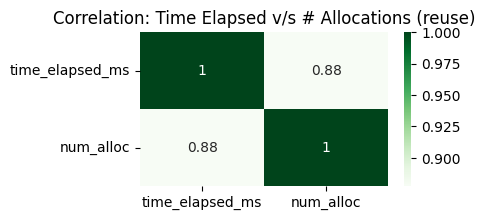

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,40253,4034116
Lean/Elab/Do.lean,32947,6328540
Lean/Elab/Quotation.lean,27980,3926757
Lean/Meta/Match/MatchEqs.lean,26102,2950442
Lean/Elab/App.lean,25978,4005911
...,...,...
Lean/Runtime.lean,139,45677
Lean/Meta/TransparencyMode.lean,135,63389
Init/Data/Int/Bitwise.lean,128,61700


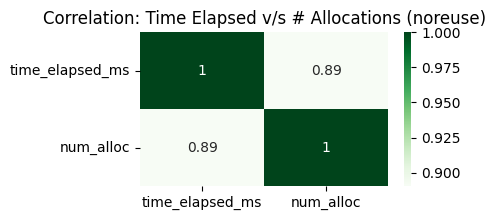

,time_elapsed_ms,num_alloc
File,,
Lean/Elab/Tactic/Omega/Frontend.lean,42338,4034116
Lean/Elab/Tactic/Omega/Frontend.lean,40253,4034116
Lean/Elab/Do.lean,32947,6328540
Lean/Elab/Quotation.lean,31730,3926757
Lean/Elab/Do.lean,31500,6328540
...,...,...
Init/Data/Int/Bitwise.lean,128,61700
Init/Data/Char.lean,120,53141
Init/Data/Char.lean,106,53141


In [ ]:
df_full = None

# for each file, grab num alloc and time elapsed.
variant2df = { "reuse" : reuse, "noreuse": noreuse }
for (variant, df) in variant2df.items():
    metric2df = {}
    for metric in ["time_elapsed_ms", "num_alloc"]:
      out = df[df["Metric"] == metric].copy()
      out = out[["File", "Value"]]
      out.rename(columns={"Value" : metric}, inplace=True)
      out = out[["File", metric]].set_index("File")
      metric2df[metric] = out
    
    df_metrics_merged = metric2df["time_elapsed_ms"].join(metric2df["num_alloc"])
    df_metrics_merged = df_metrics_merged.sort_values(by='time_elapsed_ms', ascending=False)

    display(HTML(f"<h3>Correlation: Time elapsed v/s # allocations ({variant})</h3>"))
    display(df_metrics_merged)
    corr = df_metrics_merged.corr()  # Assuming df_corr is defined and populated
    plt.figure(figsize=(4,2))
    sns.heatmap(corr, cmap="Greens",annot=True)
    plt.title(f"Correlation: Time Elapsed v/s # Allocations ({variant})")
    plt.show()

    
    if df_full is None:
        df_full = df_metrics_merged
    else:
        df_full = pd.concat([df_full, df_metrics_merged])

df_full = df_full.sort_values(by='time_elapsed_ms', ascending=False)
display(df_full)
corr = df_full.corr() 
plt.figure(figsize=(4,2))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.title('Correlation: Time Elapsed v/s # Allocations (Aggregate reuse + no reuse)')
plt.show()
